# Main Jupyter Notebook

## Data preparation

In [1]:
from importnb import imports
with imports("ipynb"):
    from contributions.common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_categorical_count_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_numerical_vs_categorical_eda_visualization,
        generate_kprototype_cost_curve,
        generate_kprototype_clusters,
        generate_decision_tree_classifier,
        generate_confusion_matrix,
        generate_decision_tree
    )

In [2]:
DatasetRaw = load_dataset("dataset")
parameters = load_parameters(".")
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  string        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  string        
 5   num_subscribers     209734 non-null  int64         
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  int64         
 8   num_comments        209734 non-null  int64         
 9   num_lectures        209734 non-null  int64         
 10  content_length_min  209734 non-null  int64         
 11  published_time      209734 non-null  object        
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

## Data Cleanup

In [3]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters)
CleanUpDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166104 entries, 0 to 166103
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               166104 non-null  float64 
 1   num_subscribers     166104 non-null  int64   
 2   avg_rating          166104 non-null  float64 
 3   num_lectures        166104 non-null  int64   
 4   content_length_min  166104 non-null  int64   
 5   instructor_name     166104 non-null  category
dtypes: category(1), float64(2), int64(3)
memory usage: 9.5 MB


In [4]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106240 entries, 0 to 106239
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               106240 non-null  float64 
 1   num_subscribers     106240 non-null  int64   
 2   avg_rating          106240 non-null  float64 
 3   num_lectures        106240 non-null  int64   
 4   content_length_min  106240 non-null  int64   
 5   instructor_name     106240 non-null  category
dtypes: category(1), float64(2), int64(3)
memory usage: 7.0 MB


## Simple Exploratory Data Analysis

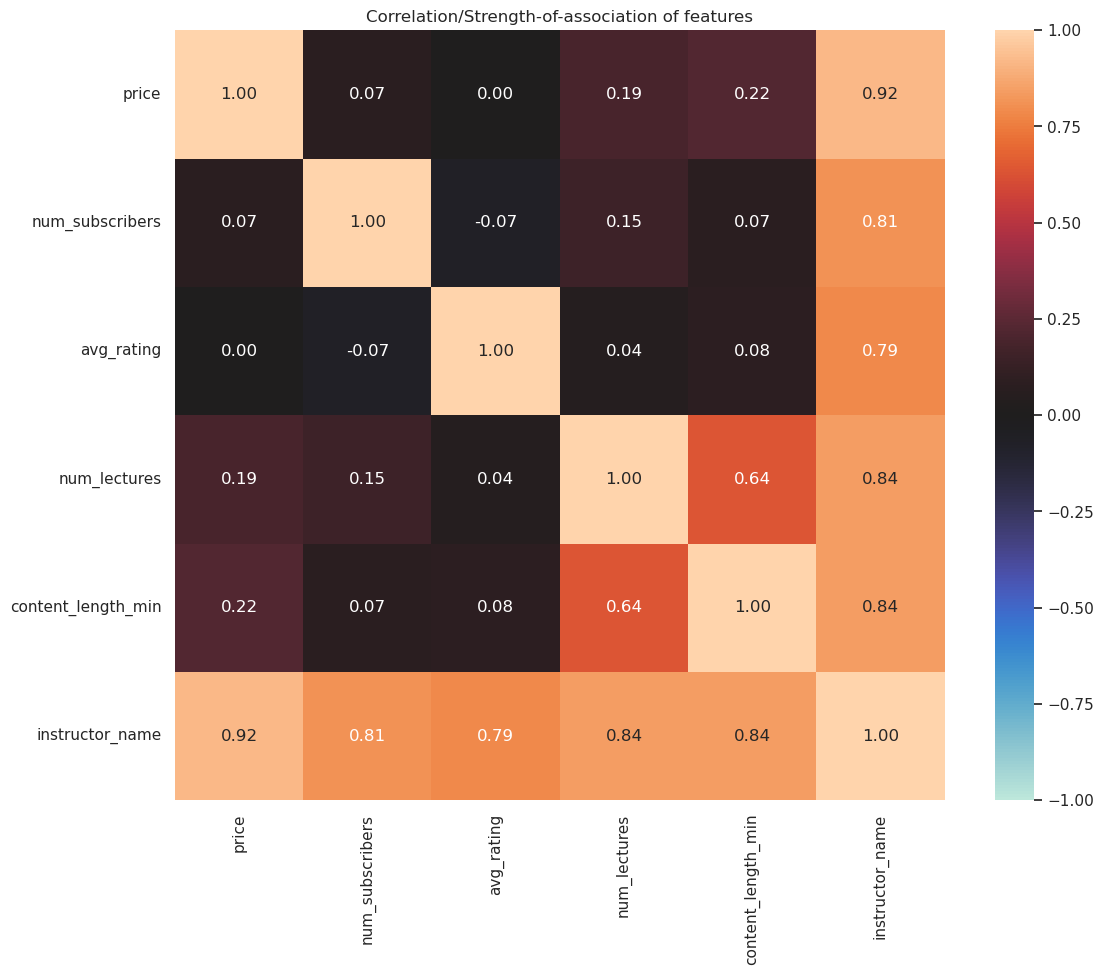

In [5]:
generate_numerical_categorical_heatmap(RemovedOutlierDataset)

## Unsupervised ML Model (K-Mean + K-Modes = Kprototypes)
- Generate cost curve
- Create cluster
- add cluster into dataframe

 20%|██        | 1/5 [00:00<00:03,  1.09it/s]

Init: initializing centroids
Init: initializing clusters
Can't cluster with 0 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 47157798131.0953
Init: initializing centroids
Init: initializing clusters
Starting iterati

 40%|████      | 2/5 [02:26<04:18, 86.20s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8759, ncost: 13323675321.711323
Run: 1, iteration: 2/100, moves: 2802, ncost: 13081867913.380291
Run: 1, iteration: 3/100, moves: 654, ncost: 13067995578.465351
Run: 1, iteration: 4/100, moves: 147, ncost: 13067336264.208769
Run: 1, iteration: 5/100, moves: 23, ncost: 13067320676.728886
Run: 1, iteration: 6/100, moves: 6, ncost: 13067319590.772013
Run: 1, iteration: 7/100, moves: 2, ncost: 13067319451.671124
Run: 1, iteration: 8/100, moves: 0, ncost: 13067319451.671124
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 8967, ncost: 13263805702.614708
Run: 2, iteration: 2/100, moves: 2466, ncost: 13077532218.63498
Run: 2, iteration: 3/100, moves: 554, ncost: 13067730379.046581
Run: 2, iteration: 4/100, moves: 111, ncost: 13067333080.762983
Run: 2, iteration: 5/100, moves: 20, ncost: 13067320676.728895
Run: 2, itera

 60%|██████    | 3/5 [13:22<11:32, 346.09s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12770, ncost: 8345264073.803833
Run: 1, iteration: 2/100, moves: 7907, ncost: 7470980396.278435
Run: 1, iteration: 3/100, moves: 4568, ncost: 7160747908.154838
Run: 1, iteration: 4/100, moves: 2371, ncost: 7074600397.957576
Run: 1, iteration: 5/100, moves: 1231, ncost: 7050711644.761522
Run: 1, iteration: 6/100, moves: 598, ncost: 7045253088.135098
Run: 1, iteration: 7/100, moves: 309, ncost: 7043616501.374354
Run: 1, iteration: 8/100, moves: 158, ncost: 7043218311.290318
Run: 1, iteration: 9/100, moves: 63, ncost: 7043146789.150889
Run: 1, iteration: 10/100, moves: 33, ncost: 7043128534.565576
Run: 1, iteration: 11/100, moves: 22, ncost: 7043115329.600485
Run: 1, iteration: 12/100, moves: 28, ncost: 7043097846.371511
Run: 1, iteration: 13/100, moves: 16, ncost: 7043093303.058996
Run: 1, iteration: 14/100, moves: 12, ncost: 7043091157.825862
Run: 1, iteration: 15/100, moves:

 80%|████████  | 4/5 [37:23<12:58, 778.54s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14736, ncost: 6160811008.84938
Run: 1, iteration: 2/100, moves: 6314, ncost: 5957582395.8947525
Run: 1, iteration: 3/100, moves: 3338, ncost: 5889501530.99563
Run: 1, iteration: 4/100, moves: 2367, ncost: 5861802179.95061
Run: 1, iteration: 5/100, moves: 2915, ncost: 5821604265.208372
Run: 1, iteration: 6/100, moves: 5774, ncost: 5696981619.709331
Run: 1, iteration: 7/100, moves: 6545, ncost: 5574770050.514854
Run: 1, iteration: 8/100, moves: 5556, ncost: 5435823551.305105
Run: 1, iteration: 9/100, moves: 4910, ncost: 5304120256.1002445
Run: 1, iteration: 10/100, moves: 3598, ncost: 5237720222.063478
Run: 1, iteration: 11/100, moves: 2393, ncost: 5209702623.084191
Run: 1, iteration: 12/100, moves: 1477, ncost: 5196932526.213802
Run: 1, iteration: 13/100, moves: 975, ncost: 5191590732.949996
Run: 1, iteration: 14/100, moves: 578, ncost: 5189513737.289519
Run: 1, iteration: 15

100%|██████████| 5/5 [1:04:56<00:00, 779.33s/it] 


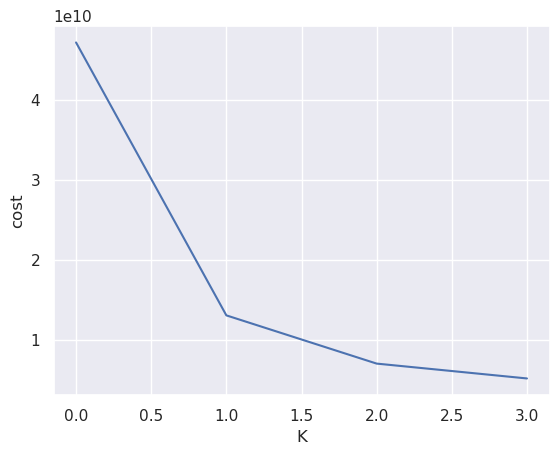

In [6]:
generate_kprototype_cost_curve(RemovedOutlierDataset, parameters)

In [7]:
AddClusterDataset, cluster_ids = generate_kprototype_clusters(RemovedOutlierDataset, parameters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 26964, ncost: 2017532713.4906108
Run: 1, iteration: 2/100, moves: 14815, ncost: 1783697979.7209973
Run: 1, iteration: 3/100, moves: 11496, ncost: 1655003648.6696975
Run: 1, iteration: 4/100, moves: 8358, ncost: 1577534725.0252686
Run: 1, iteration: 5/100, moves: 6472, ncost: 1529476535.5372615
Run: 1, iteration: 6/100, moves: 5072, ncost: 1497706202.072106
Run: 1, iteration: 7/100, moves: 4641, ncost: 1470575168.0852492
Run: 1, iteration: 8/100, moves: 4156, ncost: 1445524980.4481952
Run: 1, iteration: 9/100, moves: 3984, ncost: 1416449546.1477458
Run: 1, iteration: 10/100, moves: 3502, ncost: 1388856979.5611136
Run: 1, iteration: 11/100, moves: 2598, ncost: 1374861096.7993546
Run: 1, iteration: 12/100, moves: 2016, ncost: 1367251529.3749065
Run: 1, iteration: 13/100, moves: 1759, ncost: 1362453872.211585
Run: 1, iteration: 14/100, moves: 1738, ncost: 1357549112.5081544
Run:

## Verify ML Model

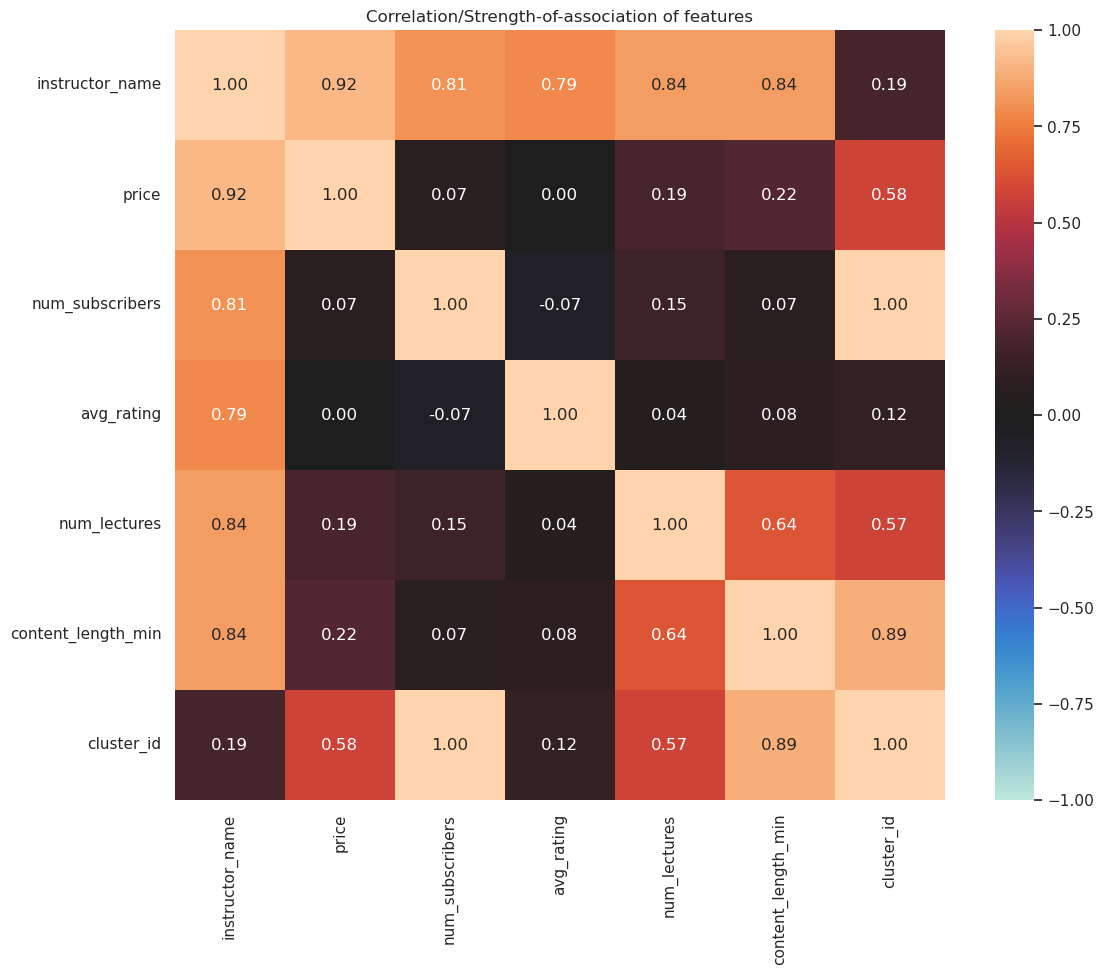

In [8]:
generate_numerical_categorical_heatmap(AddClusterDataset)

In [9]:
decision_tree_classier = generate_decision_tree_classifier(AddClusterDataset, parameters)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6131400602409639

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6135165662650602



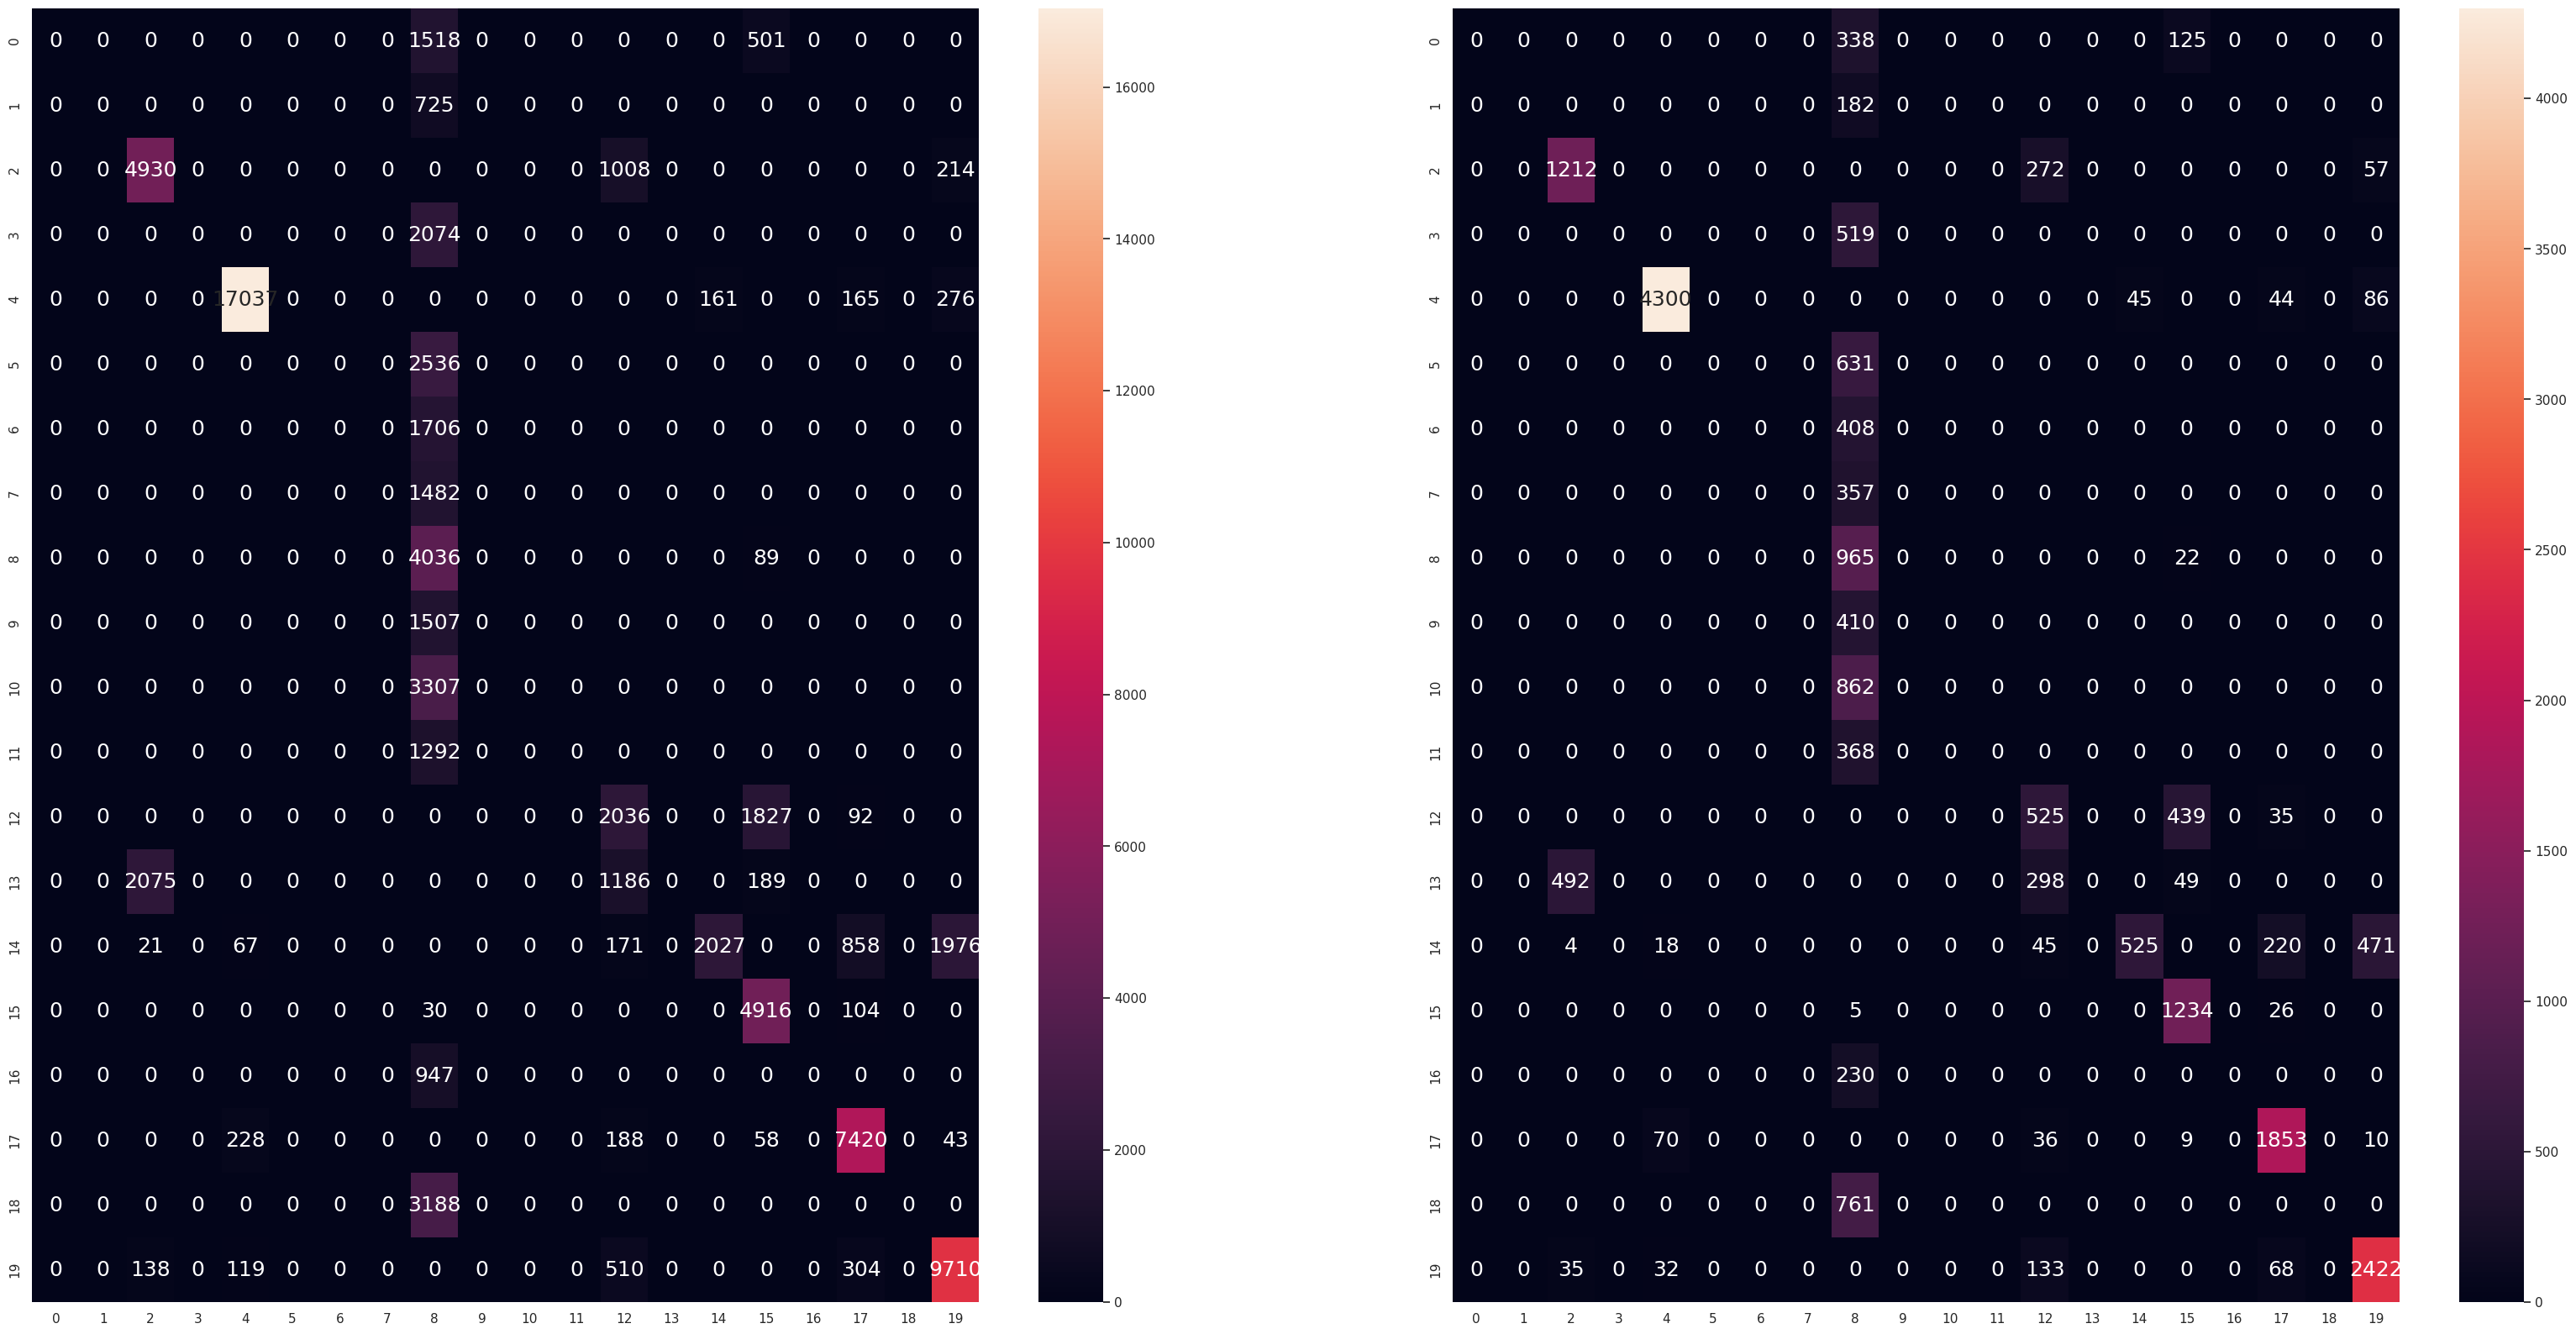

In [10]:
generate_confusion_matrix(decision_tree_classier)

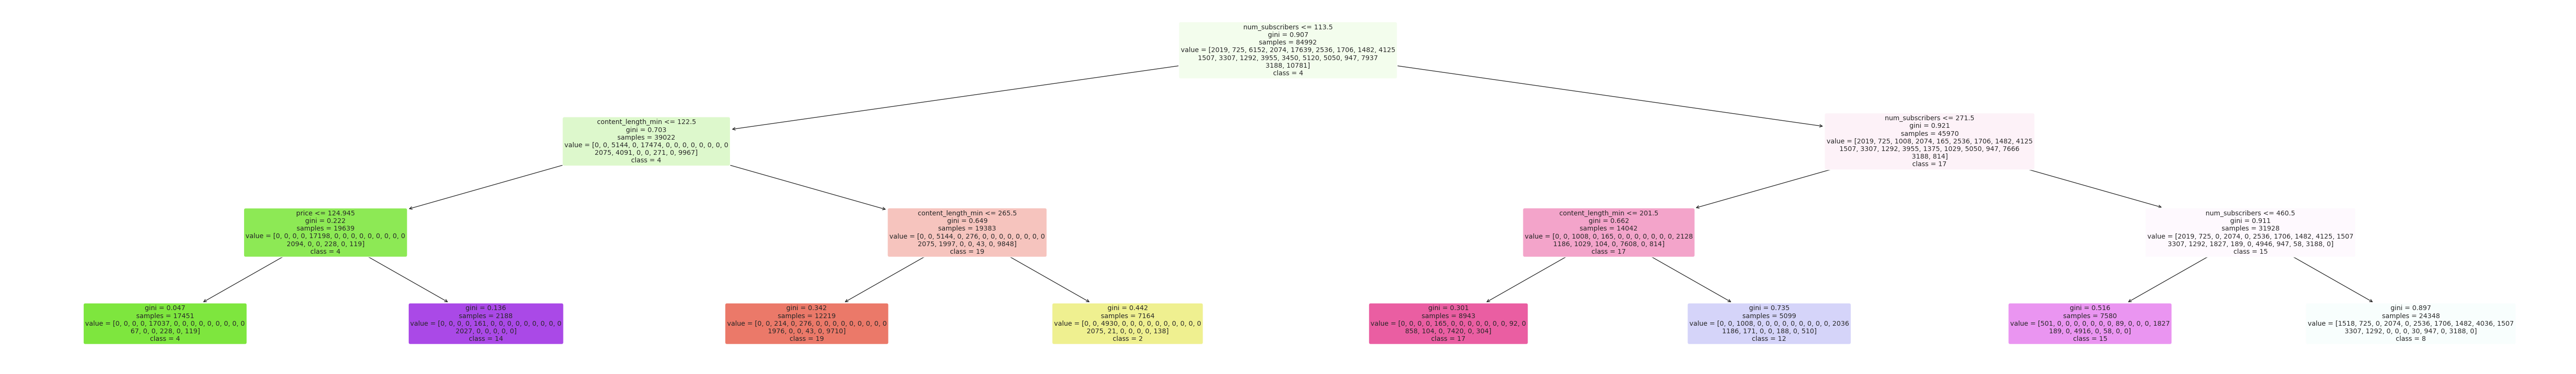

In [12]:
generate_decision_tree(decision_tree_classier, parameters, cluster_ids)